In [1]:
# Setting the working directory
import os
os.getcwd()

'C:\\Users\\Administrator\\Downloads\\Python_work\\Edureka\\YOLO'

**🧭 Testing YOLO v3 - Objects Detection Algorithm**
* Using **'dnn'** OpenCV library for loading model of Neural Network from configuration file.

* Using weights trained on COCO dataset of 80 classes.


![](https://github.com/sichkar-valentyn/1-million-images-for-Traffic-Signs-Classification-tasks/blob/main/images/slideshow_classification.gif?raw=true)

**📥 Importing needed libraries**

In [2]:
# Importing necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

**📂 Loading COCO class labels from file**

In [3]:
# Opening file, reading, eliminating whitespaces, and splitting by '\n', which in turn creates list
labels = open('coco.names').read().strip().split('\n')
print(labels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [4]:
# Defining paths to the weights and configuration file with model of Neural Network
weights_path       = 'yolov3.weights'
configuration_path = 'yolov3.cfg'

# Setting minimum probability to eliminate weak predictions
probability_minimum = 0.5

# Setting threshold for non maximum suppression
threshold = 0.3

**🗂️ Loading trained YOLO Objects Detector with the help of 'dnn' library from OpenCV**

In [5]:
network = cv2.dnn.readNetFromDarknet(configuration_path, weights_path)

# Getting names of all layers
layers_names_all = network.getLayerNames()  # list of layers' names
print(layers_names_all)

['conv_0', 'bn_0', 'relu_1', 'conv_1', 'bn_1', 'relu_2', 'conv_2', 'bn_2', 'relu_3', 'conv_3', 'bn_3', 'relu_4', 'shortcut_4', 'conv_5', 'bn_5', 'relu_6', 'conv_6', 'bn_6', 'relu_7', 'conv_7', 'bn_7', 'relu_8', 'shortcut_8', 'conv_9', 'bn_9', 'relu_10', 'conv_10', 'bn_10', 'relu_11', 'shortcut_11', 'conv_12', 'bn_12', 'relu_13', 'conv_13', 'bn_13', 'relu_14', 'conv_14', 'bn_14', 'relu_15', 'shortcut_15', 'conv_16', 'bn_16', 'relu_17', 'conv_17', 'bn_17', 'relu_18', 'shortcut_18', 'conv_19', 'bn_19', 'relu_20', 'conv_20', 'bn_20', 'relu_21', 'shortcut_21', 'conv_22', 'bn_22', 'relu_23', 'conv_23', 'bn_23', 'relu_24', 'shortcut_24', 'conv_25', 'bn_25', 'relu_26', 'conv_26', 'bn_26', 'relu_27', 'shortcut_27', 'conv_28', 'bn_28', 'relu_29', 'conv_29', 'bn_29', 'relu_30', 'shortcut_30', 'conv_31', 'bn_31', 'relu_32', 'conv_32', 'bn_32', 'relu_33', 'shortcut_33', 'conv_34', 'bn_34', 'relu_35', 'conv_35', 'bn_35', 'relu_36', 'shortcut_36', 'conv_37', 'bn_37', 'relu_38', 'conv_38', 'bn_38', 'r

In [6]:
# Getting only output layers' names that we need from YOLO algorithm
layers_names_output = [layers_names_all[i[0] - 1] for i in network.getUnconnectedOutLayers()]  # list of layers' names
print(layers_names_output)  # ['yolo_82', 'yolo_94', 'yolo_106']

['yolo_82', 'yolo_94', 'yolo_106']


**🗀 Loading input image from file**

In [7]:
# Print all files in a folder using os library
print(os.listdir('test_images'))

import glob
glob.glob('test_images/*')

['1.jpeg', 'cat1.jpg', 'cat2.jpg', 'horse.jpg', 'ts_to_test.jpg']


['test_images\\1.jpeg',
 'test_images\\cat1.jpg',
 'test_images\\cat2.jpg',
 'test_images\\horse.jpg',
 'test_images\\ts_to_test.jpg']

In [8]:
# Setting the path for test images
path_to_test_images = 'C:\\Users\\Administrator\\Downloads\\Python_work\\Edureka\\YOLO\\test_images'

In [9]:
# Our image initially is in RGB format - But 'cv2.imread' opens it in BGR format
image_input = cv2.imread(os.path.join(path_to_test_images + '\\cat2.jpg'))

# Getting image shape
print(image_input.shape)  # tuple of (917, 1222, 3)

(917, 1222, 3)


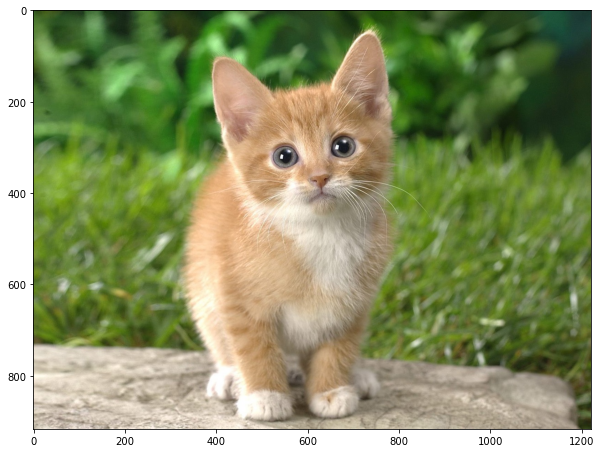

In [10]:
# Showing RGB image but firstly converting it from BGR format
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()

**💡 Getting blob from input image**

In [11]:
"""The 'cv2.dnn.blobFromImage' function returns 4-dimensional blob from input image after mean subtraction, normalizing, and
RB channels swapping. Resulted shape has number of images, number of channels, width and height eg.
    blob = cv2.dnn.blobFromImage(image, scalefactor=1.0, size, mean, swapRB=True)
"""

blob = cv2.dnn.blobFromImage(image_input, 1 / 255.0, (416, 416), swapRB=True, crop=False)
print(image_input.shape)  # (917, 1222, 3)
print(blob.shape)  # (1, 3, 416, 416)

(917, 1222, 3)
(1, 3, 416, 416)


(416, 416, 3)


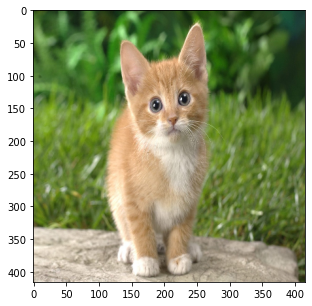

In [12]:
# Slicing blob and transposing to make channels come at the end
blob_to_show = blob[0, :, :, :].transpose(1, 2, 0)
print(blob_to_show.shape)  # (416, 416, 3)

# Showing 'blob_to_show'
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.imshow(blob_to_show)
plt.show()

**➰ Implementing forward pass with our blob and only through output layers**

In [13]:
# Calculating at the same time, needed time for forward pass
network.setInput(blob)  # setting blob as input to the network
start = time.time()
output_from_network = network.forward(layers_names_output)
end = time.time()

# Showing spent time for forward pass
print('YOLO v3 took {:.5f} seconds'.format(end - start))

YOLO v3 took 2.03493 seconds


In [14]:
print(type(output_from_network))  # <class 'list'>
print(type(output_from_network[0]))  # <class 'numpy.ndarray'>

<class 'list'>
<class 'numpy.ndarray'>


**🌈 Colours for representing every detected object**

In [15]:
# Seed the generator
np.random.seed(42)
# randint(low, high=None, size=None, dtype='l')
colours = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')
print(colours.shape)  # (80, 3)
print(colours[0])  # [102 220 225]

(80, 3)
[102 220 225]


In [16]:
# Preparing lists for detected bounding boxes, obtained confidences and class's number
bounding_boxes = []
confidences = []
class_numbers = []

In [17]:
# Getting spacial dimension of input image
h, w = image_input.shape[:2]  # Slicing from tuple only first two elements

# Check point
print(h, w)  # 917 1222

917 1222


**➿ Going through all output layers after feed forward and answer from network**

In [18]:
for result in output_from_network:
    # Going through all detections from current output layer
    for detection in result:
        # Getting class for current object
        scores = detection[5:]
        class_current = np.argmax(scores)

        # Getting confidence (probability) for current object
        confidence_current = scores[class_current]

        # Eliminating weak predictions by minimum probability
        if confidence_current > probability_minimum:
            # Scaling bounding box coordinates to the initial image size
            # YOLO data format keeps center of detected box and its width and height
            # That is why we can just elementwise multiply them to the width and height of the image
            box_current = detection[0:4] * np.array([w, h, w, h])

            # From current box with YOLO format getting top left corner coordinates
            # that are x_min and y_min
            x_center, y_center, box_width, box_height = box_current.astype('int')
            x_min = int(x_center - (box_width / 2))
            y_min = int(y_center - (box_height / 2))

            # Adding results into prepared lists
            bounding_boxes.append([x_min, y_min, int(box_width), int(box_height)])
            confidences.append(float(confidence_current))
            class_numbers.append(class_current)

**🔂 Implementing non maximum suppression of given boxes and corresponding scores**

In [19]:
# It is needed to make sure the data type of the boxes is 'int'
# and the type of the confidences is 'float'
# https://github.com/opencv/opencv/issues/12789
results = cv2.dnn.NMSBoxes(bounding_boxes, confidences, probability_minimum, threshold)

# Check point
# Showing labels of the detected objects
for i in range(len(class_numbers)):
    print(labels[int(class_numbers[i])])

# Saving found labels
with open('found_labels.txt', 'w') as f:
    for i in range(len(class_numbers)):
        f.write(labels[int(class_numbers[i])])


cat
cat


**🖽 Drawing bounding boxes and labels**

In [20]:
# Checking if there is at least one detected object
if len(results) > 0:
    # Going through indexes of results
    for i in results.flatten():
        # Getting current bounding box coordinates
        x_min, y_min = bounding_boxes[i][0], bounding_boxes[i][1]
        box_width, box_height = bounding_boxes[i][2], bounding_boxes[i][3]

        # Preparing colour for current bounding box
        colour_box_current = [int(j) for j in colours[class_numbers[i]]]

        # Drawing bounding box on the original image
        cv2.rectangle(image_input, (x_min, y_min), (x_min + box_width, y_min + box_height),
                      colour_box_current, 5)

        # Preparing text with label and confidence for current bounding box
        text_box_current = '{}: {:.4f}'.format(labels[int(class_numbers[i])], confidences[i])

        # Putting text with label and confidence on the original image
        cv2.putText(image_input, text_box_current, (x_min, y_min - 7), cv2.FONT_HERSHEY_SIMPLEX,
                    1.5, colour_box_current, 5)

**🖼️ Showing RGB image with bounding boxes and labels**

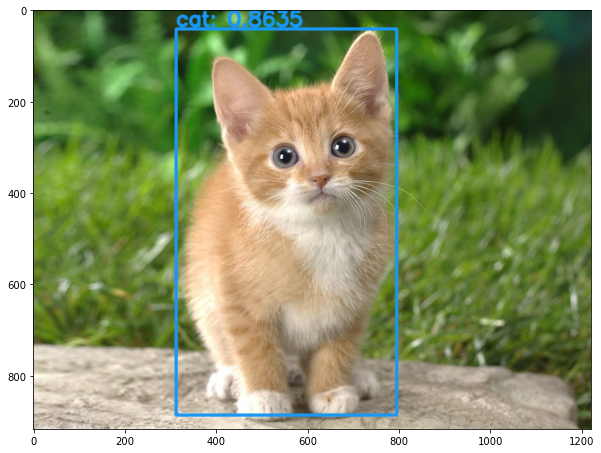

In [21]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))
plt.show()
